In [1]:
#initial import of relevant packages for graphing
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FuncFormatter
#https://stackoverflow.com/questions/32085531/importing-a-csv-file-into-python-to-make-scatterplots-and-histograms

In [2]:
#read in the data
df = pd.read_csv("1-17-25_agonist_as_antagonist_plate_all_drugs_data_for_plot.csv", index_col=0)  # Set the first column as row index

In [3]:
df

,OxA,Suvorexant,DMSO,Z5052318887,PV-006669822259,Z2017261328,Z1679037537,PV-006693400816,PV-006634533361,PV-006687433267,...,PV-006621251098,PV-006688879098,PV-006706116130,PV-006544139142,PV-006710095262,PV-006655328768,PV-006666022285,PV-006612138035,PV-006668031637,Z1316825222
Treatment,,,,,,,,,,,,,,,,,,,,,
Replicate 1,409560,3880,52600,176400,22160,123000,130160,128680,329600,82880,...,23000,75440,279480,101120,51080,171680,55720,134240,133240,91120
Replicate 2,163800,2160,68640,213600,122960,48920,285040,273200,368760,132760,...,188120,97840,143360,204120,32520,56400,208880,90120,49440,77440
Replicate 3,260320,2680,65240,239760,170880,231080,79400,399480,373720,156880,...,27920,115880,203800,119680,56560,130400,149320,96520,145720,61880
Replicate 4,262760,2240,79400,76920,142240,174600,64600,148120,129080,153040,...,43920,47360,120560,95160,45240,87200,144360,150640,64400,82760


In [5]:
# Get the divisor: OxA at "average" row
divisor = df.loc[["Replicate 1", "Replicate 2", "Replicate 3", "Replicate 4"], "OxA"].mean()

# Divide the entire DataFrame by that value
df_normalized = df / divisor

#set df_normalized to df
df = df_normalized

In [6]:
#get mean and std dev
column_means = df.mean(axis=0)  # Mean of each column
column_stds = df.std(axis=0)    # Standard deviation of each column

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


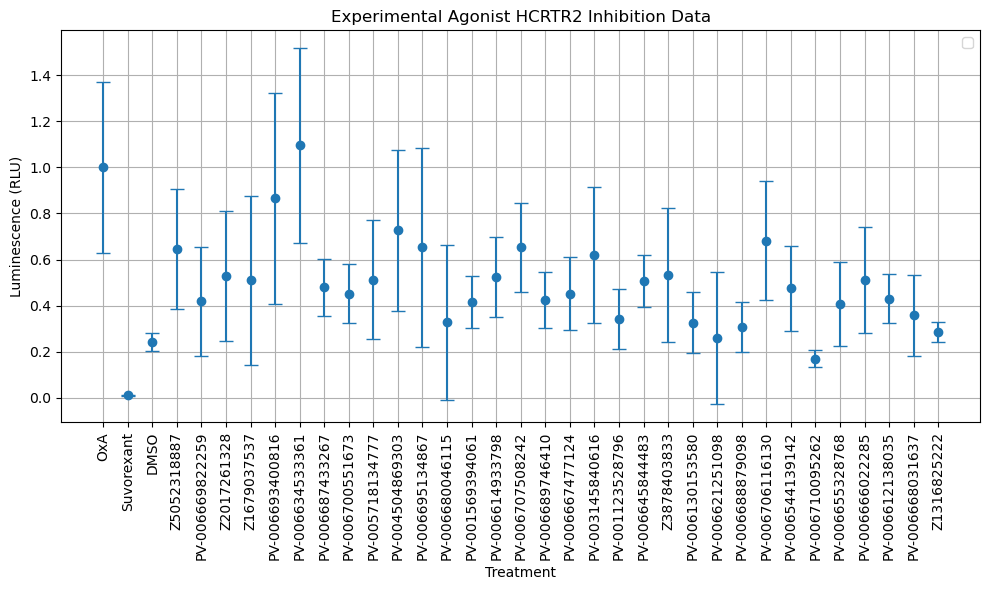

In [7]:
#make plot


plt.figure(figsize=(10, 6))
plt.errorbar(column_means.index, column_means, yerr=column_stds, fmt='o', capsize=5)

# Customizing the plot
plt.title('Experimental Agonist HCRTR2 Inhibition Data')
plt.xlabel('Treatment')
plt.ylabel('Luminescence (RLU)')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.grid(True)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
drug_data = df.transpose()
# Drop the row for the drug named "Suvorexant"
drug_data = drug_data.drop("Suvorexant", axis=0)
drug_data

Treatment,Replicate 1,Replicate 2,Replicate 3,Replicate 4
OxA,1.494145,0.597570,0.949692,0.958593
DMSO,0.191894,0.250410,0.238007,0.289665
Z5052318887,0.643537,0.779249,0.874685,0.280617
PV-006669822259,0.080843,0.448579,0.623399,0.518916
Z2017261328,0.448725,0.178468,0.843019,0.636971
Z1679037537,0.474846,1.039875,0.289665,0.235672
PV-006693400816,0.469447,0.996680,1.457371,0.540367
PV-006634533361,1.202437,1.345299,1.363394,0.470906
PV-006687433267,0.302360,0.484331,0.572325,0.558316
PV-006700551673,0.503739,0.412097,0.594214,0.293897


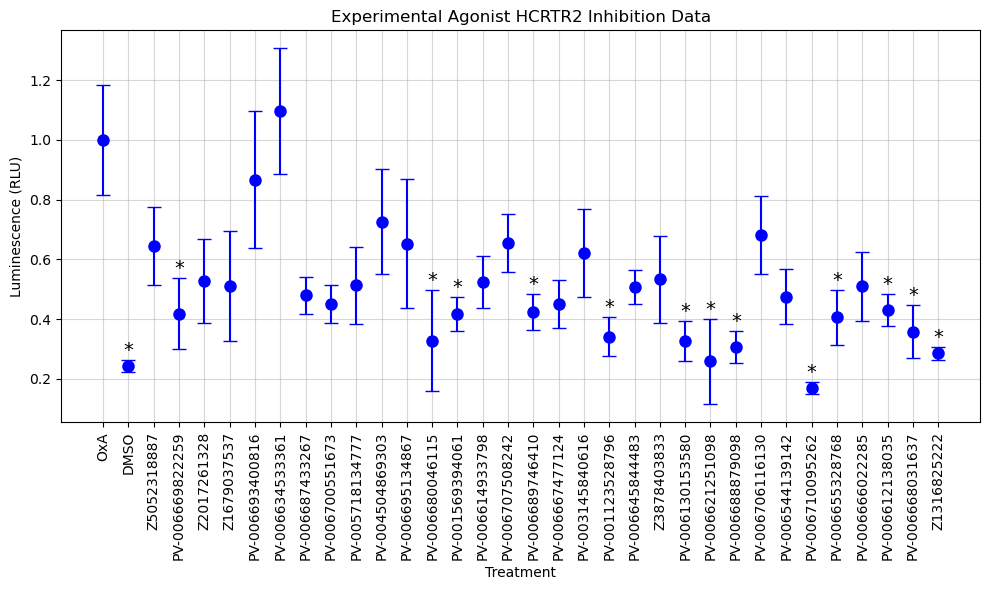

In [9]:
# Extract drug names from the index (row headers)
drug_names = drug_data.index  # Drug names are now the row index
replicates = drug_data  # Replicates are the rest of the data (without the row names)

# Step 2: Calculate mean and standard error for each drug
drug_means = replicates.mean(axis=1)  # Mean across replicates (rows for each drug)
drug_sems = replicates.sem(axis=1)  # Standard error across replicates (rows for each drug)

# Step 3: Perform statistical analysis (t-test against the first drug)
# The first drug is now the first row in the data (first index)
first_drug_values = replicates.iloc[0, :]  # First drug's replicates

# Store p-values for the comparisons
p_values = []

for i, drug in enumerate(drug_names):
    # Compare each drug's data with the first drug using a t-test
    drug_values = replicates.iloc[i, :]  # Data for the current drug
    _, p_value = stats.ttest_ind(first_drug_values, drug_values, equal_var=False)  # Welch's t-test
    p_values.append(p_value)

# Step 4: Plot the data with error bars
plt.figure(figsize=(10, 6))

# Specify a color for all data points (e.g., 'blue')
color = 'blue'

# Plot the drugs with error bars and set all data points to the same color
for i, drug in enumerate(drug_names):
    plt.errorbar(
        [i], drug_means[i], yerr=drug_sems[i], fmt="o", label=drug, capsize=5, markersize=8, color=color
    )

# Add asterisks for statistical significance
for i, p_value in enumerate(p_values):
    if p_value < 0.05:
        plt.text(
            i, drug_means[i] + drug_sems[i], "*", ha="center", va="bottom", fontsize=14, color="black"
        )

# Customize the plot
plt.title('Experimental Agonist HCRTR2 Inhibition Data')
plt.xlabel('Treatment')
plt.ylabel('Luminescence (RLU)')
plt.xticks(np.arange(len(drug_names)), drug_names, rotation=90, ha="center")
plt.grid(alpha=0.5)
plt.tight_layout()

# Show the plot
plt.show()